In [1]:
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings

def warnings_function():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings_function()

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
demot_data = pd.read_csv('demonetization-tweets.csv', delimiter = ',', encoding = 'latin-1')
demot_data.head(5)

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,801495527024160768,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,801495445583360002,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [6]:
demot_data = demot_data.drop(['Unnamed: 0', 'replyToSN', 'replyToSID', 'replyToUID', 'screenName', 'statusSource'], axis=1)
demot_data = demot_data.rename(columns = {'created': 'date'})
demot_data = demot_data[['date', 'id', 'text', 'favorited', 'favoriteCount', 'truncated', 'retweetCount', 'isRetweet', 'retweeted']]

In [7]:
stop_words = list(stopwords.words('english'))
stop_words.append('https')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Text(0,0.5,'Count Distribution')

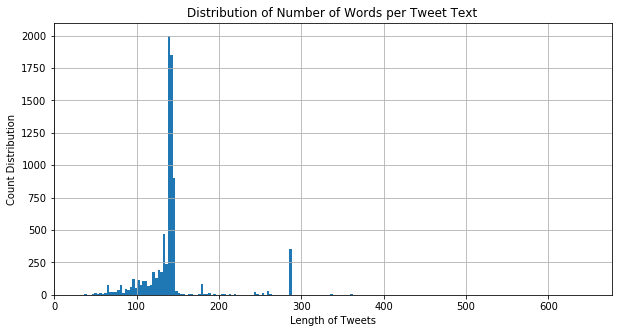

In [8]:
demot_data.text.map(len).hist(figsize=(10, 5), bins=200)
plt.title('Distribution of Number of Words per Tweet Text')
plt.xlabel('Length of Tweets')
plt.ylabel('Count Distribution')

In [9]:
demot_data['text'] = demot_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [10]:
demot_data['text'].head(5)

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @Hemant_80: Did vote #Demonetization Modi s...
2    RT @roshankar: Former FinSec, RBI Dy Governor,...
3    RT @ANI_news: Gurugram (Haryana): Post office ...
4    RT @satishacharya: Reddy Wedding! @mail_today ...
Name: text, dtype: object

In [11]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

demot_data['text'] = demot_data['text'].apply(clean_text)

In [12]:
demot_data['text'][0]

'rt rssurjewala critical question was paytm informed demonetization edict pm it is clearly fishy requires full disclosure amp'

In [13]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
demot_data['textTokens'] = demot_data['text'].apply(lambda x: tokenizer.tokenize(x))

In [14]:
for text, tokens in zip(demot_data['text'].head(5), demot_data['textTokens'].head(5)):
    print('Text Description:', text)
    print('Tokens:', tokens)
    print('\n')

Text Description: rt rssurjewala critical question was paytm informed demonetization edict pm it is clearly fishy requires full disclosure amp
Tokens: ['rt', 'rssurjewala', 'critical', 'question', 'was', 'paytm', 'informed', 'demonetization', 'edict', 'pm', 'it', 'is', 'clearly', 'fishy', 'requires', 'full', 'disclosure', 'amp']


Text Description: rt hemant did vote demonetization modi survey app
Tokens: ['rt', 'hemant', 'did', 'vote', 'demonetization', 'modi', 'survey', 'app']


Text Description: rt roshankar former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization if aam aadmi listen th
Tokens: ['rt', 'roshankar', 'former', 'finsec', 'rbi', 'dy', 'governor', 'cbdt', 'chair', 'harvard', 'professor', 'lambaste', 'demonetization', 'if', 'aam', 'aadmi', 'listen', 'th']


Text Description: rt aninews gurugram haryana post office employees provide cash exchange patients hospitals demonetization https t co ugmxup
Tokens: ['rt', 'aninews', 'gurugram', 'haryana', 'p

In [15]:
demot_data.head(5)

,date,id,text,favorited,favoriteCount,truncated,retweetCount,isRetweet,retweeted,textTokens
0,2016-11-23 18:40:30,801495656976318464,rt rssurjewala critical question was paytm inf...,False,0,False,331,True,False,"[rt, rssurjewala, critical, question, was, pay..."
1,2016-11-23 18:40:29,801495654778413057,rt hemant did vote demonetization modi survey app,False,0,False,66,True,False,"[rt, hemant, did, vote, demonetization, modi, ..."
2,2016-11-23 18:40:03,801495544266821632,rt roshankar former finsec rbi dy governor cbd...,False,0,False,12,True,False,"[rt, roshankar, former, finsec, rbi, dy, gover..."
3,2016-11-23 18:39:59,801495527024160768,rt aninews gurugram haryana post office employ...,False,0,False,338,True,False,"[rt, aninews, gurugram, haryana, post, office,..."
4,2016-11-23 18:39:39,801495445583360002,rt satishacharya reddy wedding mailtoday carto...,False,0,False,120,True,False,"[rt, satishacharya, reddy, wedding, mailtoday,..."


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')

In [17]:
tf_idf_matrix = vectorizer.fit_transform(list(demot_data['textTokens'].map(lambda tokens: ' '.join(tokens))))

tf_idf_matrix.shape

(8000, 4409)

In [18]:
tf_idf_matrix

<8000x4409 sparse matrix of type '<class 'numpy.float64'>'
	with 152332 stored elements in Compressed Sparse Row format>

In [19]:
tfidf_value_map = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf_value_map = pd.DataFrame(columns=['tfidf_value']).from_dict(dict(tfidf_value_map), orient='index')
tfidf_value_map.columns = ['tfidf_value']

Text(0,0.5,'Number of Terms')

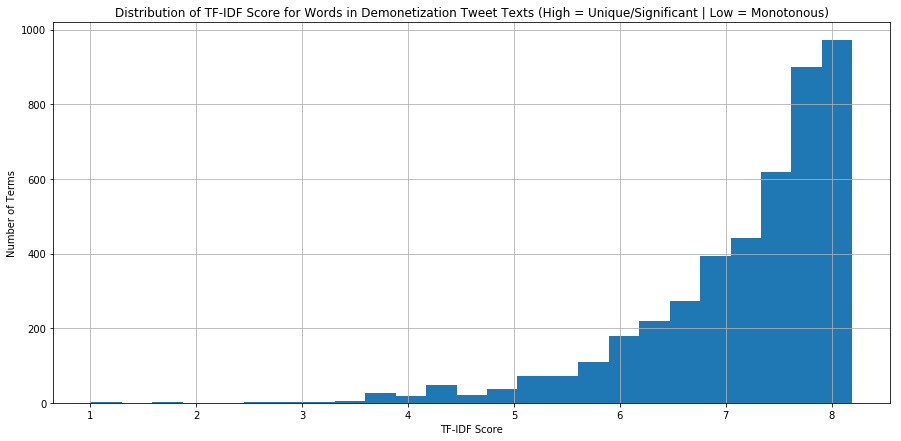

In [148]:
tfidf_value_map.tfidf_value.hist(bins=25, figsize=(15,7))
plt.title('Distribution of TF-IDF Score for Words in Demonetization Tweet Texts (High = Unique/Significant | Low = Monotonous)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Number of Terms')

In [136]:
from wordcloud import WordCloud

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

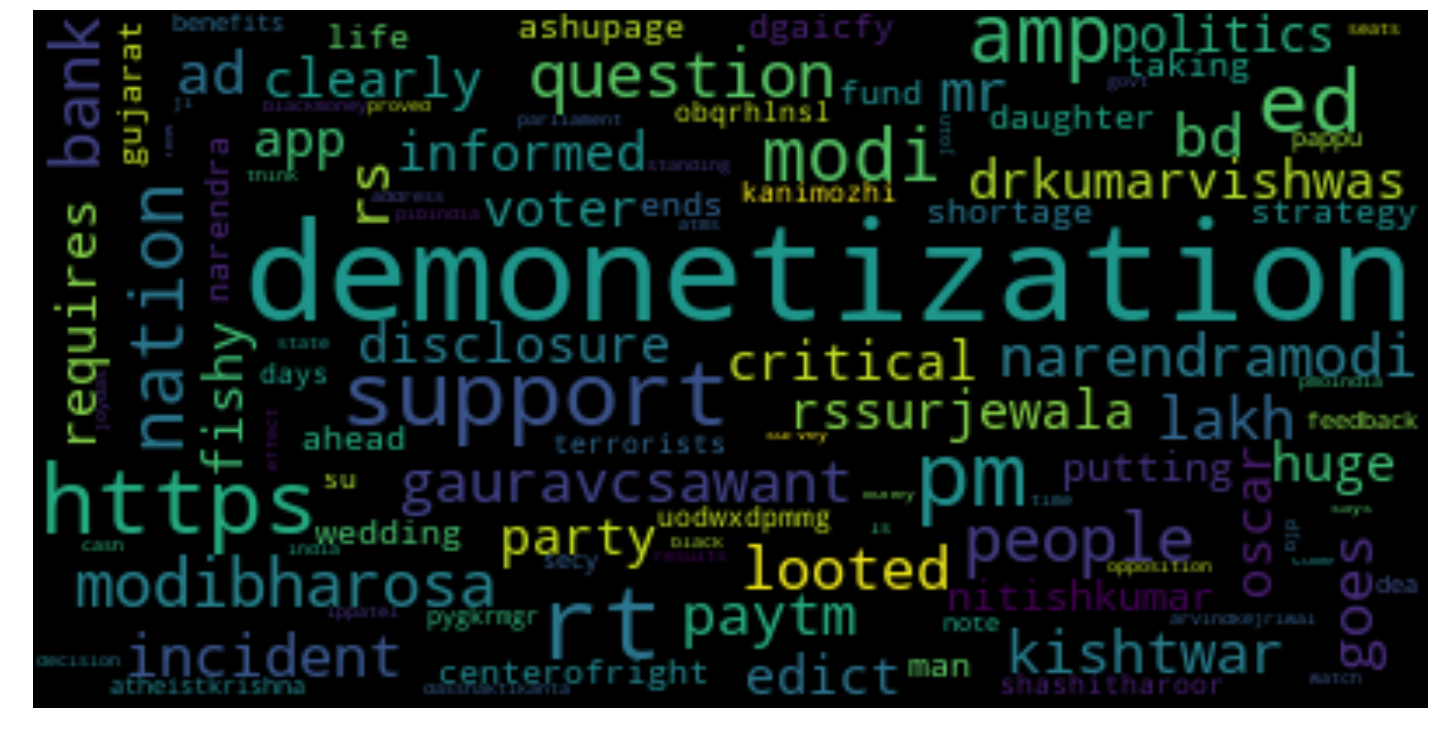

In [141]:
plot_word_cloud(tfidf_value_map.sort_values(by=['tfidf_value'], ascending=True).head(200))

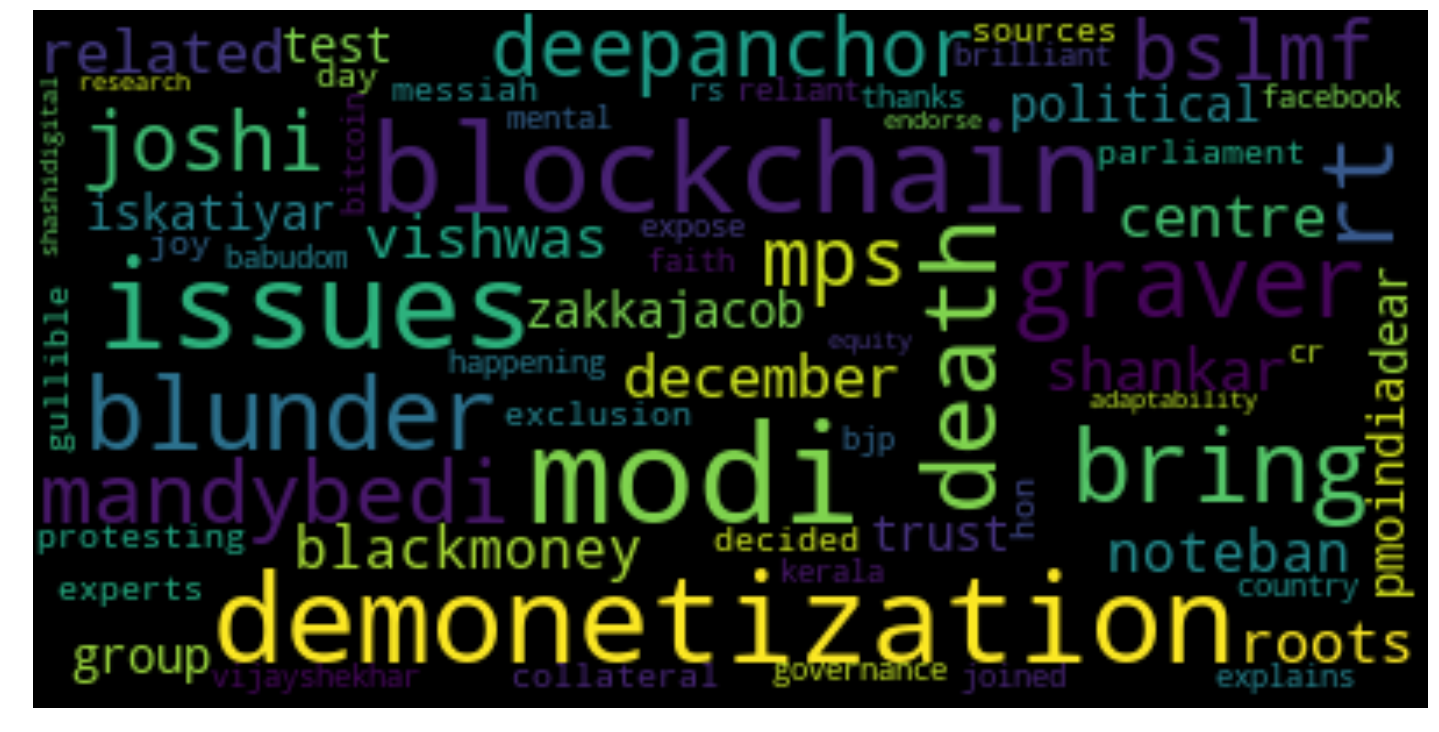

In [149]:
plot_word_cloud(tfidf_value_map.sort_values(by=['tfidf_value'], ascending=False).head(50))

In [158]:
#Non-Negative Matrix Factorization for Topic Modeling
from sklearn.decomposition import NMF

nmf_vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 3), stop_words='english')
nmf_vz = nmf_vectorizer.fit_transform(list(demot_data['textTokens'].map(lambda tokens: ' '.join(tokens))))

nmf = NMF(n_components=40, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(nmf_vz)

feature_names = nmf_vectorizer.get_feature_names()
no_top_words = 10

for topic_idx, topic in enumerate(nmf.components_[:10]):
    print("Topic %d:" %(topic_idx+1))
    print(" | ".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print('\n')

Topic 1:
looted | lakh looted | kishtwar | amp incident demonetization | bank kishtwar | bank kishtwar amp | kishtwar amp | amp incident | looted bank kishtwar | looted bank


Topic 2:
ed | bd ed | bd | ed bd ed | ed bd | ed ed | ed ed bd | bd ed ed | ed ad | mr ed bd


Topic 3:
politics nitishkumar | putting nation | party politics | supports pm narendramodi | party politics nitishkumar | nation party | nation party politics | putting nation party | politics nitishkumar supports | nitishkumar supports pm


Topic 4:
informed demonetization edict | informed demonetization | paytm informed demonetization | rssurjewala critical | rssurjewala critical question | paytm informed | question paytm informed | demonetization edict | question paytm | critical question


Topic 5:
huge support | huge support pm | support pm | demonetization nation | support pm narendramodi | demonetization nation people | nation people | huge | narendramodi demonetization nation | nation people demonetization


Top